# [The Elements of Statistical Learning in Julia](https://github.com/jcontesti/the-elements-of-statistical-learning-in-julia)

# Chapter: 2.3 Tow Simple Approaches: Least Squares and Nearest Neighbors

## Objectives

1. Understanding of the basics of Linear Models and Least Squares.
2. Complete a simple classification example using Least Squares and Nearest Neighbors.

## Source code

### Classification example with linear regression

In [1]:
using LinearAlgebra, Plots, RData

training_palette = [:lightblue, :orange];

In [2]:
# Load Gaussian distributions mixture data
mixture = load("../../data/ESL.mixture.rda", convert=true)

# Load traininig data
X = mixture["ESL.mixture"]["x"]
y = mixture["ESL.mixture"]["y"];

200-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [3]:
# Add a column with ones
X = hcat(ones(size(X, 1)), X);

In [4]:
# Create plot for training data (X matrix)
training_plot = scatter(
    X[:,2], 
    X[:,3], 
    group = y,
    palette = training_palette,
    ticks = false,
    legend = false,
    framestyle = :box,
);

In [5]:
# Compute β using the unique solution to the normal equation 
β = (X' * X)^-1 * X' * y

3-element Array{Float64,1}:
  0.32906140217745844
 -0.022635999378620698
  0.24959834132864353

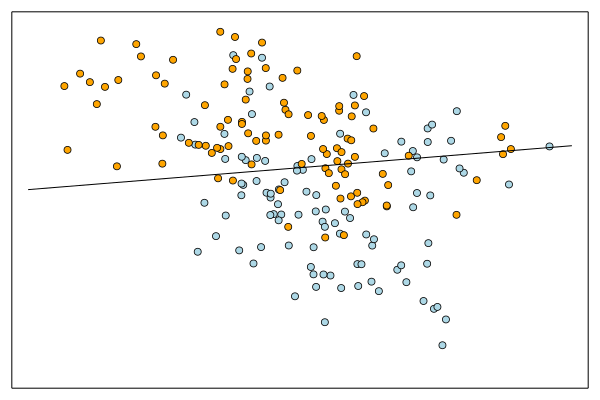

In [6]:
# Declare the function that will compute the linear model
Ŷ(x1, x2) = β[1] + x1 * β[2] + x2 * β[3] 

# Prepare data to show the decision boundary
# @TODO is there any more convenient way to do it?
alpha = 0.5
step = 0.5
x1 = range(minimum(X[:,2]) - alpha, maximum(X[:,2]) + alpha, step=step)
x2 = range(minimum(X[:,3]) - alpha, maximum(X[:,3]) + alpha, step=step)

# Add the decision boundary at Ŷ = 0.5
contour!(
    training_plot,
    x1, 
    x2,
    Ŷ,
    levels = [0.5],
    color = :black,
)

### Classification example with Nearest Neighbors